In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

%matplotlib inline

### Baca data

In [2]:
data = np.genfromtxt("dataRV.txt", names=["t", "v"])

In [3]:
t = data['t'].copy()
v = data['v'].copy()

### Plot semua

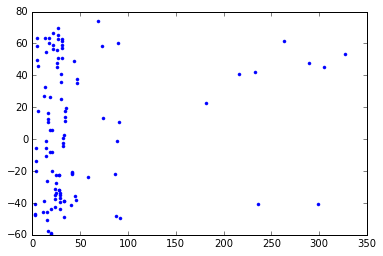

In [4]:
plt.plot(t, v, 'b.')

### Untuk yang repet2

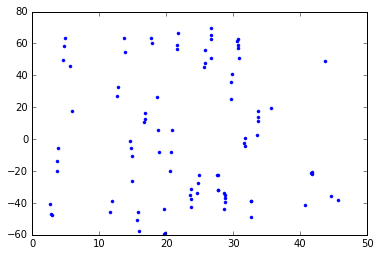

In [5]:
plt.plot(t[:90], v[:90], '.')

### Fungsi fitting

$y = A \sin{(\frac{2 \pi}{T} x + \theta)} + C$

### Tes untuk data yang sebarannya baik
-- bagian awal saja

In [6]:
tt = t[:90]
vv = v[:90]

Parameter hasil fitting:  [-57.01595783   4.23178893   3.4931485    8.13378339]


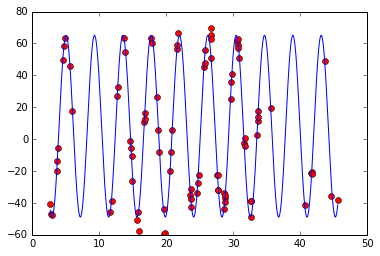

In [7]:
# Fit the first set
fitfunc = lambda p, x: p[0]*np.sin(2*np.pi/p[1]*x + p[2]) + p[3] # Target function 
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function

p0 = [60.0, 4.0, 1.0, 0.0] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(tt, vv))

print "Parameter hasil fitting: ", p1

time = np.linspace(tt.min(), tt.max(), 1000)
plt.plot(tt, vv, "ro", time, fitfunc(p1, time), "b-") # Plot of the data and the fit

plt.show()

### Tes untuk semua data

Parameter hasil fitting:  [-31.86705265   3.99763288   1.66054265   6.26944918]


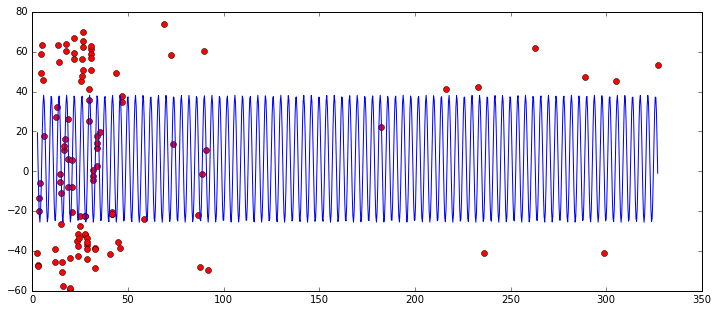

In [8]:
# Fit the first set
fitfunc = lambda p, x: p[0]*np.sin(2*np.pi/p[1]*x+p[2]) + p[3] # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function

p0 = [60.0, 4.0, 1.0, 0.0] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(t, v))

print "Parameter hasil fitting: ", p1

time = np.linspace(t.min(), t.max(), 1000)
plt.figure(figsize=(12, 5))
plt.plot(t, v, "ro", time, fitfunc(p1, time), "b-") # Plot of the data and the fit

plt.show()

Least square mudah gagal karena data bagian akhir yang sebarannya tidak merata... metode least square "tidak robust", tidak terlalu baik hasilnya jika ada data pencilan. Hasil di atas bisa lebih baik apabila tebakan awal yang cukup dekat dengan nilai yang 'benar'.

### Modifikasi tebakan awal agar lebih dekat dengan hasil

Parameter hasil fitting:  [-56.41228912   4.23112873   3.48870008   7.52945271]


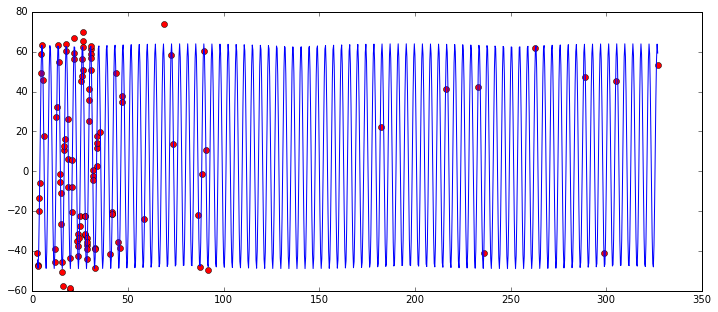

In [9]:
# Fit the first set
fitfunc = lambda p, x: p[0]*np.sin(2*np.pi/p[1]*x+p[2]) + p[3] # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Distance to the target function

p0 = [56.0, 4.23, 3.5, 8.0] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(t, v))

print "Parameter hasil fitting: ", p1

time = np.linspace(t.min(), t.max(), 1000)
plt.figure(figsize=(12, 5))
plt.plot(t, v, "ro", time, fitfunc(p1, time), "b-") # Plot of the data and the fit

plt.show()

Kembali fit! Yey!

### Modifikasi fungsi fitting 
++ dekatkan tebakan awal

In [10]:
def fitfunc(p, t):
    x = t % p[1]  # t_lipat
    return p[0]*np.sin(2*np.pi/p[1]*x + p[2]) + p[3]

def errfunc(p, x, y):
    return fitfunc(p, x) - y

Parameter hasil fitting: [ 56.41229728   4.23112885   0.34710854   7.52945996]


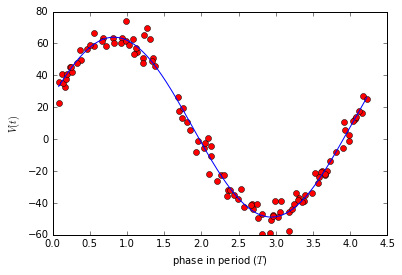

In [11]:
p0 = [56.0, 4.23, 1.0, 8.0] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc, p0[:], args=(t, v))

print 'Parameter hasil fitting:', p1

t_lipat = t % p1[1]

time = np.linspace(t_lipat.min(), t_lipat.max(), 1000)
plt.plot(t_lipat, v, "ro", time, p1[0]*np.sin(2*np.pi/p1[1]*time + p1[2]) + p1[3], "b-") # Plot of the data and the fit
plt.xlabel(r"phase in period ($T$)")
plt.ylabel(r"$V(t)$")

plt.show()